## 3 - Autoregressive Models and Autocorrelation

### 3.1 Autoregressive (AR) Models
- **Definition**: AR models express the value of a time series at a given time point as a linear combination of its previous values.
- AR(p) model:
$$X_t=\sum_{i=1}^p\phi_iX_{t-i}+\epsilon_t$$
$$\text{where }\phi_1,\dots,\phi_p\text{ are parameters of the model and }\epsilon_t\text{ is white noise.}$$
- AR(1) model:
$$X_t=\phi_1X_{t-1}+\epsilon_t$$
- AR(2) model:
$$X_t=\phi_1X_{t-1}+\phi_2X_{t-2}+\epsilon_t$$
- Fitting an AR model using the `statsmodels` library

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -138.401
Method:               Conditional MLE   S.D. of innovations              0.993
Date:                Wed, 17 Jul 2024   AIC                            284.803
Time:                        11:54:51   BIC                            295.142
Sample:                    01-03-2020   HQIC                           288.985
                         - 04-09-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5415      2.126      1.195      0.232      -1.626       6.709
Value.L1       1.0538      0.101     10.461      0.000       0.856       1.251
Value.L2      -0.0775      0.100     -0.772      0.4

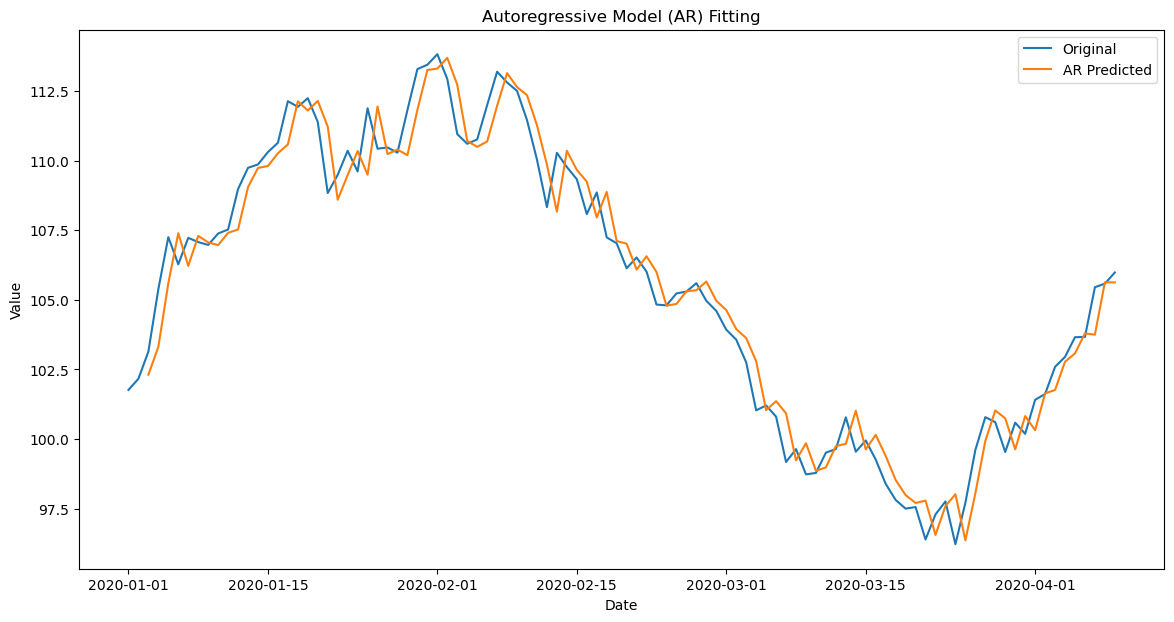

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate a sample time series
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100)
data = np.cumsum(np.random.randn(100)) + 100
df = pd.DataFrame(data, index=dates, columns=['Value'])

# Fit an AR model of order 2
model = AutoReg(df['Value'], lags=2)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Predict future values
df['AR_Predicted'] = model_fit.predict(start=0, end=len(df)-1)

# Plot original and predicted series
plt.figure(figsize=(14, 7))
plt.plot(df['Value'], label='Original', linewidth=1.5)
plt.plot(df['AR_Predicted'], label='AR Predicted', linewidth=1.5)
plt.title('Autoregressive Model (AR) Fitting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### 3.2 Autocorrelation (assuming stationarity)
**Definition**: Autocorrelation measures the correlation between a time series and its lagged values (i.e. how much the current value depends on its past values).

White noise has no autocorrelations.

**Autocorrelation Function (ACF)**: Plots the autocorrelation of the time series with various lags.


**Interpretation**
- Positive ACF: A positive ACF at lag k indicates a positive correlation between the current observation and the observation at lag k.

- Negative ACF: A negative ACF at lag k indicates a negative correlation between the current observation and the observation at lag k.

- Decay in ACF: The decay in autocorrelation as lag increases often signifies the presence of a trend or seasonality in the time series.

- Significance: Significant ACF values at certain lags may suggest potential patterns or relationships in the time series.

(References: https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/)

Plotting ACF.

<Figure size 1400x700 with 0 Axes>

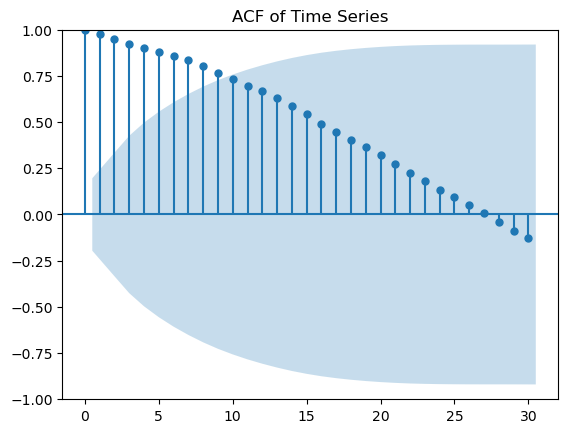

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(14, 7))
plot_acf(df['Value'], lags=30, title='ACF of Time Series')
plt.show()


- The high autocorrelation at lag 1 and the gradual decline suggest that the time series could be modeled using AR(1).
- The blue shaded area represents a 95% confidence interval around the null hypothesis that the true autocorrelation is zero.

## 4 - Stationarity


### 4.1 - Stationary Time Series
**Definition**: A stationary time series has constant mean, variance, and autocorrelation over time.

**Importance**: Many time series models, including ARIMA, assume that the series is stationary.

### 4.2 - Testing for Stationarity
**Visual Inspection**: Plotting the series to visually check for trends, seasonality, and changing variance.

**Statistical Tests**: Augmented Dickey-Fuller (ADF) test to statistically test for stationarity.


#### 4.2.1 - Augmented Dickey-Fuller (ADF) Test
- The ADF test statistic is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

- **Null Hypothesis (H0)**: The time series has a unit root (i.e., it is non-stationary).

- **Alternative Hypothesis (H1)**: The time series does not have a unit root (i.e., it is stationary).

**The ADF test results include**:

1. **ADF Statistic**: A negative number. The more negative it is, the stronger the evidence against the null hypothesis.

2. **p-value**: The probability of obtaining the observed result, or one more extreme, under the null hypothesis.

3. **Critical Values**: Values at different confidence levels (1%, 5%, 10%) to compare the test statistic against.

- If the p-value is less than the chosen alpha level (e.g., 0.05), or if the ADF statistic is less than the critical value, we reject the null hypothesis and conclude that the series is stationary.

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.1320384625097886
p-value: 0.7021277385898389
Critical Values:
   1%, -3.498198082189098
Critical Values:
   5%, -2.891208211860468
Critical Values:
   10%, -2.5825959973472097


### 4.3 - Making a Series Stationary
Detrending: Removing trends to make the series stationary.

Differencing: Subtracting the previous observation from the current observation.

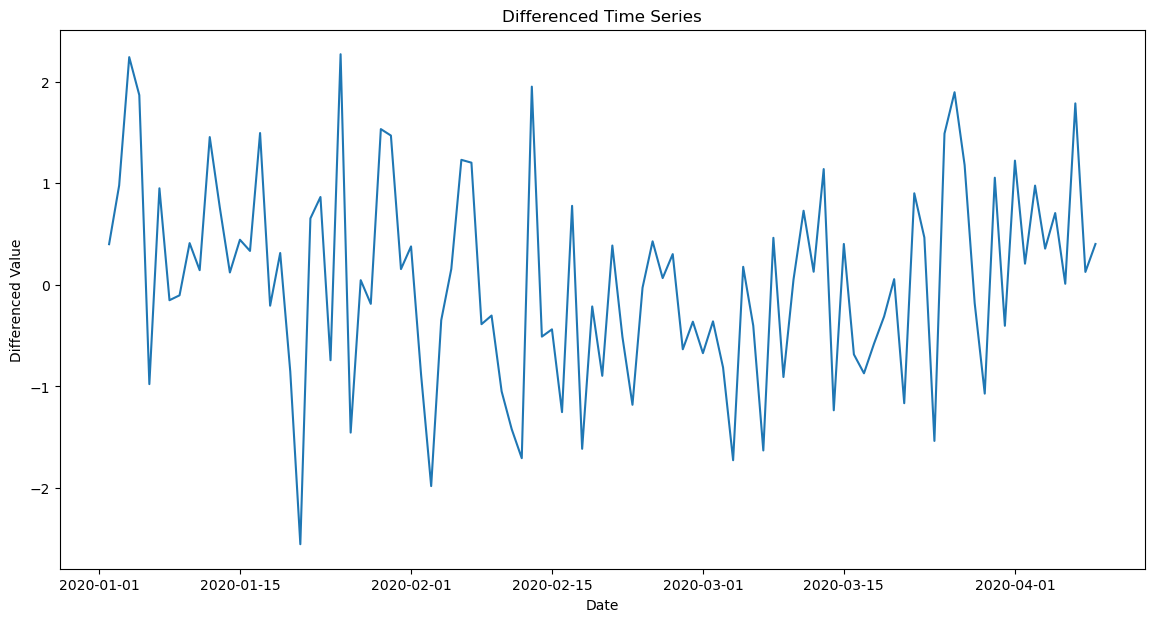

ADF Statistic (Differenced): -9.158402002940116
p-value (Differenced): 2.572286538328086e-15
Critical Values (Differenced):
   1%, -3.4989097606014496
Critical Values (Differenced):
   5%, -2.891516256916761
Critical Values (Differenced):
   10%, -2.5827604414827157


In [8]:
df['Differenced'] = df['Value'].diff().dropna()

# Plot differenced series
plt.figure(figsize=(14, 7))
plt.plot(df['Differenced'])
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()

# Perform ADF test on differenced series
result_diff = adfuller(df['Differenced'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values (Differenced):')
    print(f'   {key}, {value}')


### Exercises:
1. Autoregressive Models
- Fit AR models of different orders (e.g., AR(1), AR(3), AR(5)) to one of the given time series and compare the model summaries.

2. Stationarity

- Perform the ADF test on MSFT time series to determine if they are stationary.

- Make non-stationary time series stationary and re-test for stationarity.